In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import kaleido
import os

BASE_PATH = '../data/raw'
TRAINING_PATH = os.path.join(BASE_PATH,'cs-training.csv')
TEST_PATH = os.path.join(BASE_PATH,'cs-test.csv')

TARGET = 'SeriousDlqin2yrs'


INTERIM_BASE_PATH = '../data/interim'
TRAINING_INTERIM_PATH = os.path.join(INTERIM_BASE_PATH,'training_interim.csv')
TEST_INTERIM_PATH = os.path.join(INTERIM_BASE_PATH,'test_interim.csv')

## LOAD DATA

In [75]:
training_data = pd.read_csv(TRAINING_PATH)#.drop('Unnamed: 0',axis=1)

In [76]:
training_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [77]:
training_data.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [73]:
test_data = pd.read_csv(TEST_PATH)

In [74]:
test_data.shape

(101503, 12)

In [78]:
test_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [3]:
#data shape
training_data.shape

(150000, 11)

In [4]:
#number of duplicated data
training_data.duplicated().sum()

609

In [5]:
#remove duplicate data
training_data = training_data.drop_duplicates()

In [6]:
training_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [7]:
#checking null values
training_data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

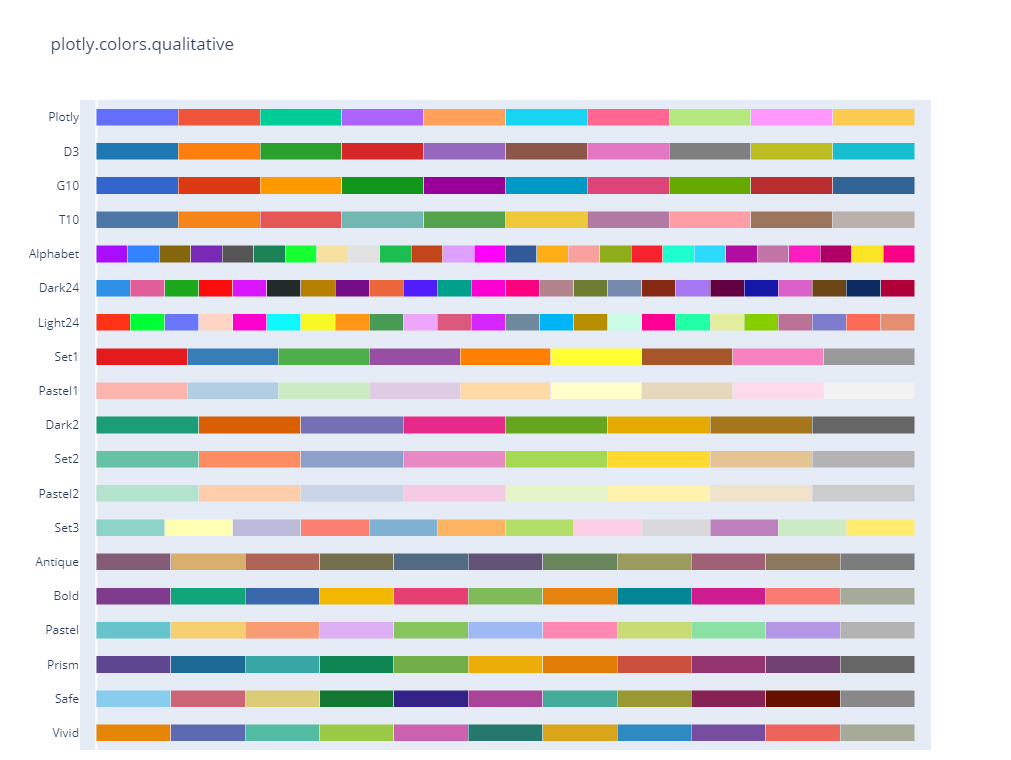

In [22]:
fig = 
fig.show()

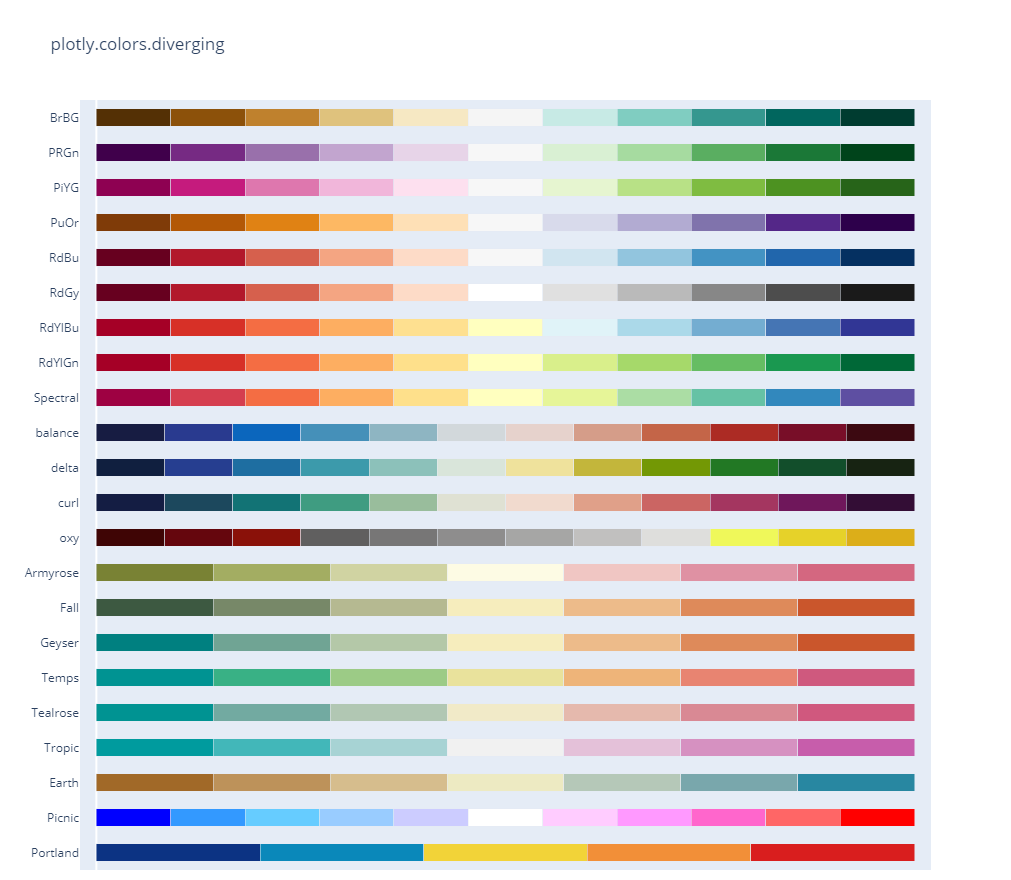

In [17]:
fig = px.colors.diverging.swatches()
fig.show()

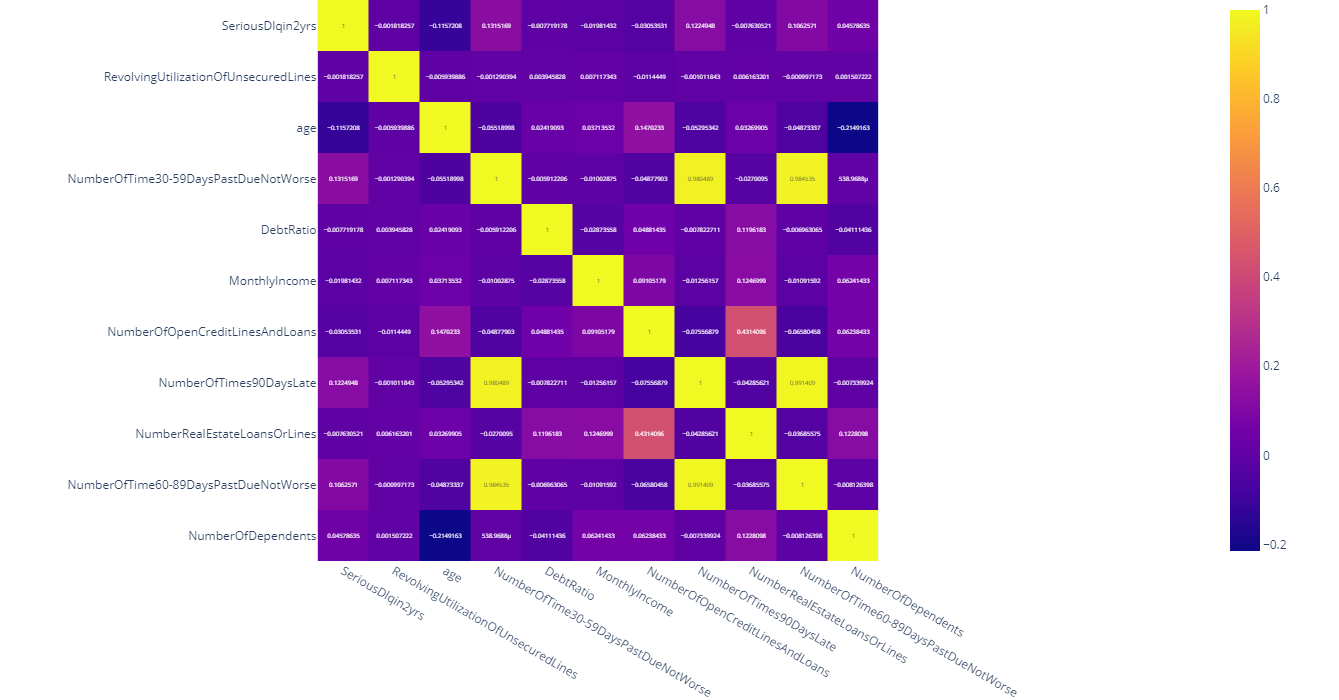

In [31]:
corr = training_data.corr()

corr_heatmap = px.imshow(corr, text_auto=True)
corr_heatmap.update_layout(width=1000,height=700,margin=dict(t=0,b=0,l=0,r=0))
corr_heatmap.show()

In [34]:
training_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [71]:
from sklearn.metrics import silhouette_samples, silhouette_score,davies_bouldin_score
from sklearn.cluster import KMeans

feature_number_of_lates = ['NumberOfTimes90DaysLate','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse']
data=training_data[feature_number_of_lates]
clusterer = KMeans(n_clusters=4,n_init=10, random_state=10)
cluster_labels = clusterer.fit_predict(data)
# silhouette_avg = silhouette_score(data, cluster_labels)
# print("For n_clusters =", 3,
#       "The average silhouette_score is :", silhouette_avg)

In [72]:
training_data['late_labels_cluster'] = cluster_labels

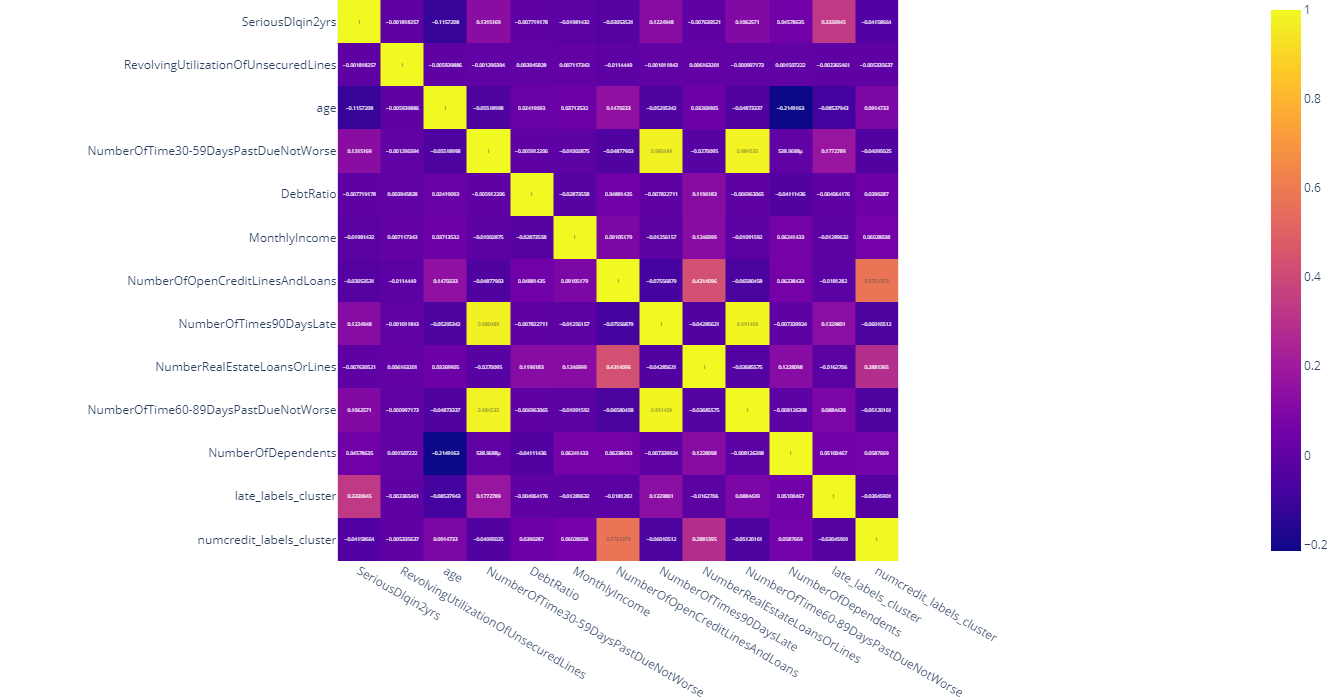

In [70]:
corr = training_data.corr()

corr_heatmap = px.imshow(corr, text_auto=True)
corr_heatmap.update_layout(width=1000,height=700,margin=dict(t=0,b=0,l=0,r=0))
corr_heatmap.show()

In [40]:
np.unique(cluster_labels)

array([0, 1], dtype=int32)

## RevolvingUtilizationOfUnsecuredLines

### Isolate RevolvingUtilizationOfUnsecuredLines with value > 1 to ~


In [15]:
training_data[['RevolvingUtilizationOfUnsecuredLines']].describe()

,RevolvingUtilizationOfUnsecuredLines
count,149391.000000
mean,6.071087
std,250.263672
min,0.000000
25%,0.030132
50%,0.154235
75%,0.556494
max,50708.000000


In [16]:
hist_revolving_univariate = px.histogram(data_frame=training_data,x='RevolvingUtilizationOfUnsecuredLines',nbins=150,
             log_y=True,orientation='v',opacity=0.5,marginal='box',template='ggplot2',
             color_discrete_sequence=px.colors.qualitative.Dark2)
hist_revolving_univariate.update_layout(title='Logged count of RevolvingUtilizationOfUnsecuredLines')
pio.show(hist_revolving_univariate,validate=False,renderer='iframe')

In [23]:
revolving_util_box = px.box(data_frame=training_data,y='RevolvingUtilizationOfUnsecuredLines',color=TARGET)
pio.show(revolving_util_box,validate=False,renderer='iframe')

In [19]:
hist_revolving_bivariate = px.histogram(data_frame=training_data,x='RevolvingUtilizationOfUnsecuredLines',nbins=150,
             log_y=True,log_x=False,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET,template='ggplot2')
hist_revolving_bivariate.update_layout(title='Logged count of RevolvingUtilizationOfUnsecuredLines from each target category')
pio.show(hist_revolving_bivariate,validate=False,renderer='iframe')

In [23]:
np.exp(1)

2.718281828459045

Insight : 
Since the class 0 dominate the spread is wider than class 1 , this visualization is yielded from log transformation from count of each revolving utilization class. 
Class 1 


Insight : 
from Boxplot with respect to the target variable , there is tendency that the quartile 1,2,3 with TARGET variable ==1 , has higher value than with TARGET variable == 0 , 
We Will Regard this as decision to remove outlier and not to follow up the feature engineering indicate utilization rate with former categorization abve

## Age

### Univariate

In [30]:
age_univariate = px.histogram(data_frame=training_data,x='age',nbins=150,opacity=0.5,template='ggplot2'
             ,color_discrete_sequence=px.colors.qualitative.Dark2)
pio.show(age_univariate,validate=False,renderer='iframe')

In [32]:
age_bivariate = px.histogram(data_frame=training_data,x='age',nbins=150,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
pio.show(age_bivariate,validate=False,renderer='iframe')

## NumberOfTime30-59DaysPastDueNotWorse

In [185]:
help(px.box)

Help on function box in module plotly.express._chart_types:

box(data_frame=None, x=None, y=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, orientation=None, boxmode=None, log_x=False, log_y=False, range_x=None, range_y=None, points=None, notched=False, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a box plot, rows of `data_frame` are grouped together into a
        box-and-whisker mark to visualize their distribution.
    
        Each box spans from quartile 1 (Q1) to quartile 3 (Q3). The second
        quartile (Q2) is marked by a line inside the box. By default, the
        whiskers correspond to the box' edges +/- 1.5 times the interquartile
        range (IQR: Q3-Q1), see "point

In [33]:
past_due_3059 = px.histogram(data_frame=training_data,x='NumberOfTime30-59DaysPastDueNotWorse',nbins=50,
             log_y=True,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
pio.show(past_due_3059,validate=False,renderer='iframe')

In [39]:
box_30_59 = px.box(training_data,x='NumberOfTime30-59DaysPastDueNotWorse',color_discrete_sequence=px.colors.qualitative.Dark2,
       color=TARGET,points=False)
pio.show(box_30_59,validate=False,renderer='iframe')

### Insights : 
There are lots of outlier, from both boxplot and kdeplot indicate the number of delay 

## DebtRatio

In [34]:
debt_ratio = px.histogram(data_frame=training_data,x='DebtRatio',nbins=100,
             log_y=True,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
pio.show(debt_ratio,validate=False,renderer='iframe')

In [103]:
monthly_income = px.histogram(data_frame=training_data,x='MonthlyIncome',nbins=200,
             log_y=True,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
pio.show(monthly_income,validate=False,renderer='iframe')

In [104]:
training_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'log_RevolvingUtilizationOfUnsecuredLines',
       'exp_RevolvingUtilizationOfUnsecuredLines', 'log_debt_ratio',
       'log_age'],
      dtype='object')

In [107]:
monthly_income = px.histogram(data_frame=training_data,x='NumberOfDependents',nbins=20,
             log_y=True,orientation='v',opacity=0.5,marginal='box',
             color_discrete_sequence=px.colors.qualitative.Dark2,color=TARGET)
pio.show(monthly_income,validate=False,renderer='iframe')

### Insights : 
From Above chart : 
1. Both 1 and 0 class in financial distress have outlier, 
2. From the spreead looks like the one with financial distress = 0 , has 

### Hypothesis 
people with higher debt ratio tend to have higher debt ratio
1st remove outlier first

In [12]:
## 
temp_income = clean_outlier_per_column(data=training_data,column='MonthlyIncome')

## NumberOfOpenCreditLinesAndLoans

In [113]:
temp_num_credit = clean_outlier_per_column(data=training_data,column='NumberOfOpenCreditLinesAndLoans')

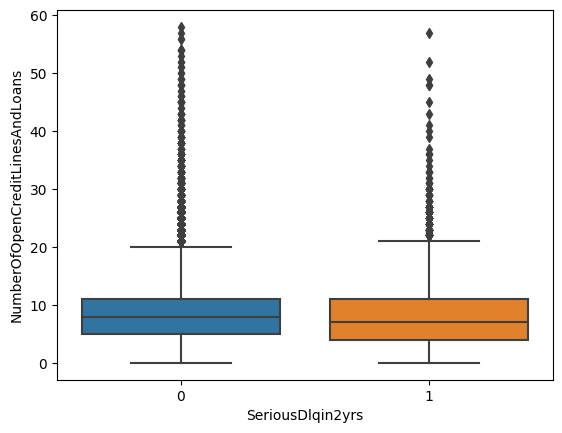

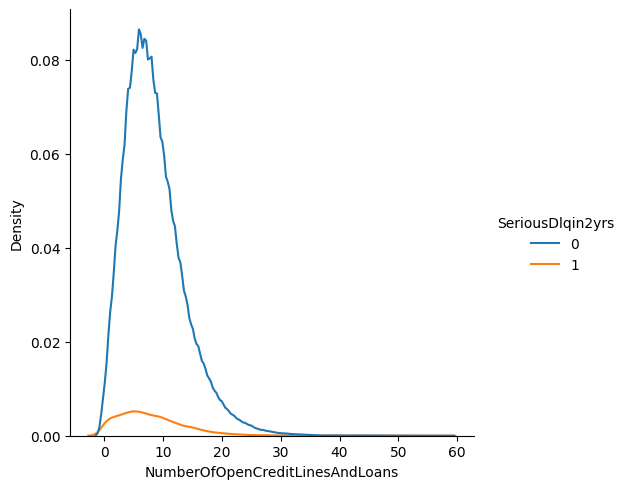

In [17]:
sns.boxplot(data=training_data,y='NumberOfOpenCreditLinesAndLoans',x=TARGET)
sns.displot(data=training_data,x='NumberOfOpenCreditLinesAndLoans',kind='kde',hue=TARGET)

### Insights : 


In [23]:
print('Median TARGET==1',training_data.loc[training_data[TARGET]==1,'NumberOfTimes90DaysLate'].value_counts())
print('Median TARGET==0',training_data.loc[training_data[TARGET]==0,'NumberOfTimes90DaysLate'].value_counts())


Median TARGET==1 0     6554
1     1765
2      776
3      385
4      195
98     143
5       83
6       48
7       31
8       15
9       14
10       5
96       4
11       3
13       2
17       1
14       1
12       1
Name: NumberOfTimes90DaysLate, dtype: int64
Median TARGET==0 0     135108
1       3478
2        779
3        282
98       121
4         96
5         48
6         32
7          7
8          6
9          5
10         3
11         2
15         2
13         2
14         1
96         1
12         1
Name: NumberOfTimes90DaysLate, dtype: int64


In [31]:
#encode number of cr
training_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [32]:
training_data['NumberofCreditLines'] = training_data['NumberOfOpenCreditLinesAndLoans'] + training_data['NumberRealEstateLoansOrLines']

In [42]:
training_data['debt_nominal'] = training_data['DebtRatio'] * training_data['MonthlyIncome']

In [48]:
training_data['log_debt_nominal'] = np.log(training_data['debt_nominal'])

/home/fakhri/give_me_credit/credit_scoring/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
#training_data['income_share_dependent'] = training_data['MonthlyIncome'] / training_data['NumberOfDependents']

In [57]:
training_data.debt_nominal

0         7323.197016
1          316.878123
2          258.914887
3          118.963951
4         1584.975094
             ...     
149995     472.774869
149996    4001.283436
149997            NaN
149998       0.000000
149999    2038.750092
Name: debt_nominal, Length: 150000, dtype: float64

In [53]:
data_corr = training_data.corr()

<AxesSubplot: >

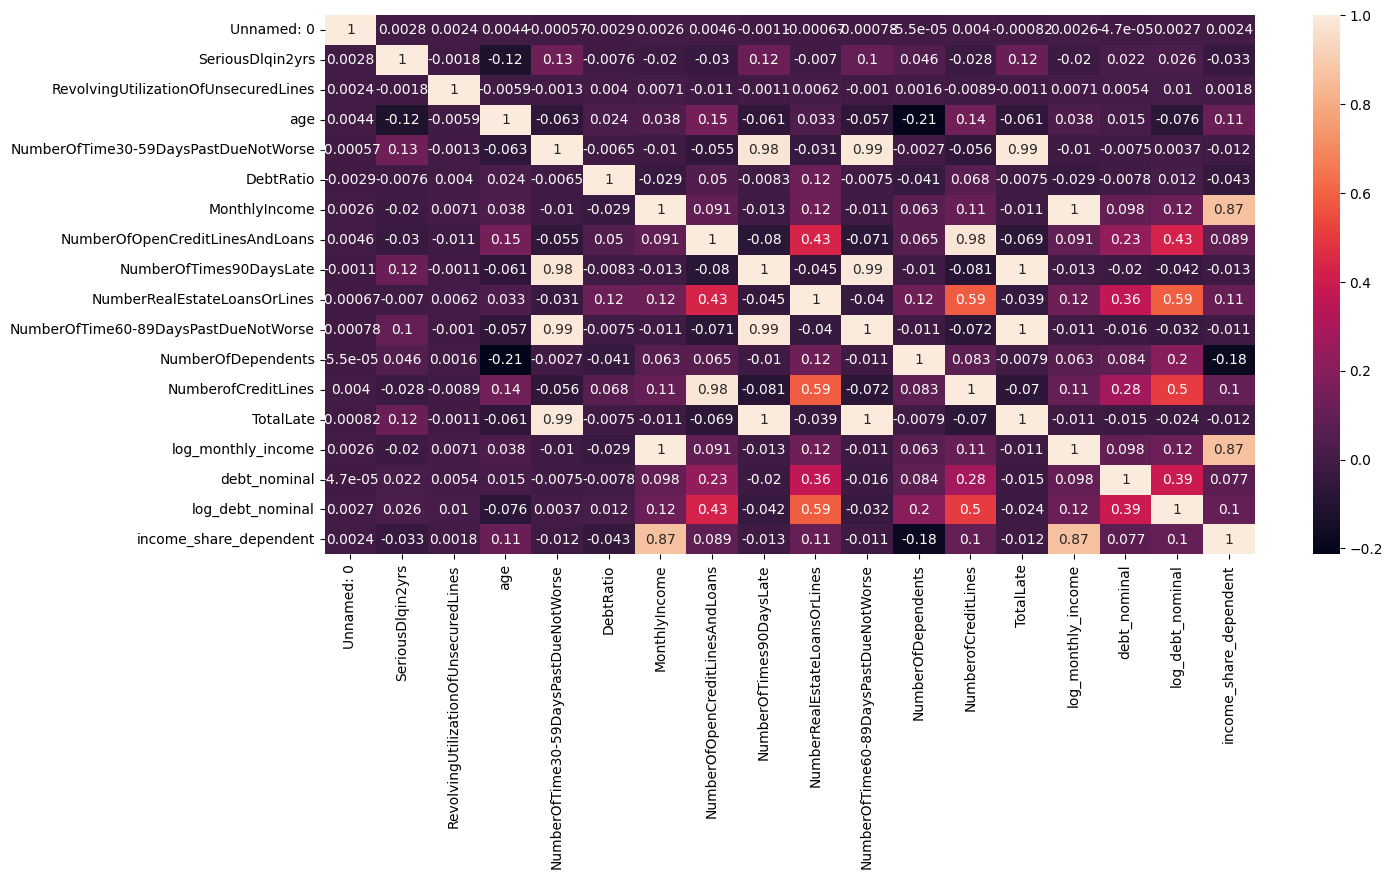

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(data_corr,annot=True)

In [59]:
training_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'NumberofCreditLines', 'TotalLate',
       'log_monthly_income', 'debt_nominal', 'log_debt_nominal',
       'income_share_dependent'],
      dtype='object')

In [60]:
training_data['NumberOfTime30-59DaysPastDueNotWorse_bin'] = pd.cut(training_data['NumberOfTime30-59DaysPastDueNotWorse'],5)

<AxesSubplot: ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

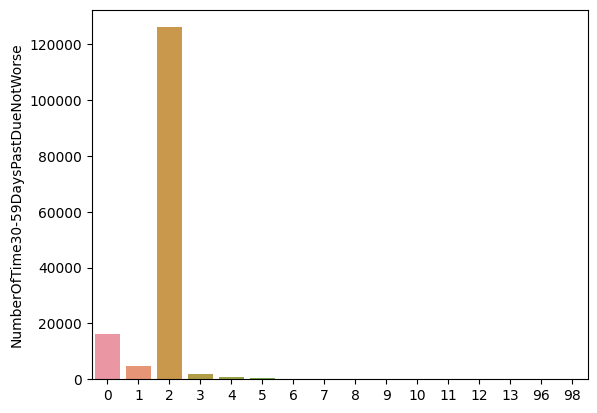

In [69]:
sns.barplot(x=training_data['NumberOfTime30-59DaysPastDueNotWorse'].unique(),
            y=training_data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts())

In [ ]:
0,1-3,4-